# GOES netCDF EDA
Sai Kamal, Chinni Setty

In [ ]:
%pip install boto3 netCDF4 numpy scipy matplotlib

In [2]:
# On Colab
# !apt-get install libnetcdf-dev libhdf5-dev

In [ ]:
%pip install tornado_helper --upgrade --no-cache-dir --find-links=. --force-reinstall --no-deps

In [2]:
from tornado_helper import GOES

downloader = GOES(partial=True)
files = downloader.download(single=True)
files

100%|██████████| 47.9M/47.9M [00:08<00:00, 5.86MB/s]


In [3]:
import netCDF4 as nc
from pathlib import Path 

file_path = files[0]
dataset = nc.Dataset(file_path)

print(dataset)
print(dataset.variables.keys())  # List of available variables

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: CONUS
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPC-M3_G16_s20171890252191_e20171890254564_c20171890255060.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    title: ABI L2 Clo

In [4]:
# Open the NetCDF dataset
try:
    dataset = nc.Dataset(file_path, mode="r")  # Open in read mode
    print("Dataset Metadata:")
    print(dataset)

    # List all available variables
    print("\nAvailable Variables:")
    for var in dataset.variables.keys():
        print(f" - {var}")

    # Print details of a specific variable (e.g., first variable)
    sample_var = list(dataset.variables.keys())[0]
    print(f"\nVariable Details ({sample_var}):")
    print(dataset.variables[sample_var])

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset Metadata:
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: CONUS
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPC-M3_G16_s20171890252191_e20171890254564_c20171890255060.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
   

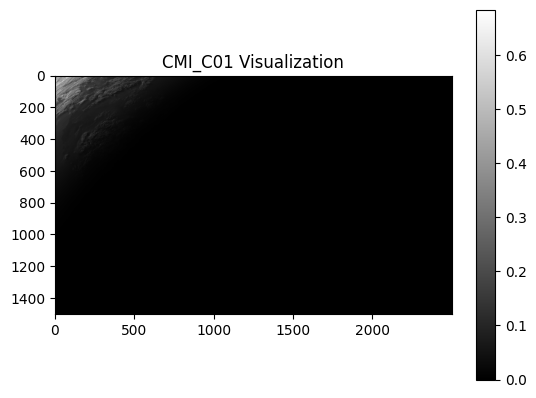

In [5]:
import matplotlib.pyplot as plt

variable_name = "CMI_C01"  # Modify this based on available variables

if variable_name in dataset.variables:
    data = dataset.variables[variable_name][:]
    plt.imshow(data, cmap="gray")  # Change colormap if needed
    plt.colorbar()
    plt.title(f"{variable_name} Visualization")
    plt.show()
else:
    print(f"Variable '{variable_name}' not found in dataset.")

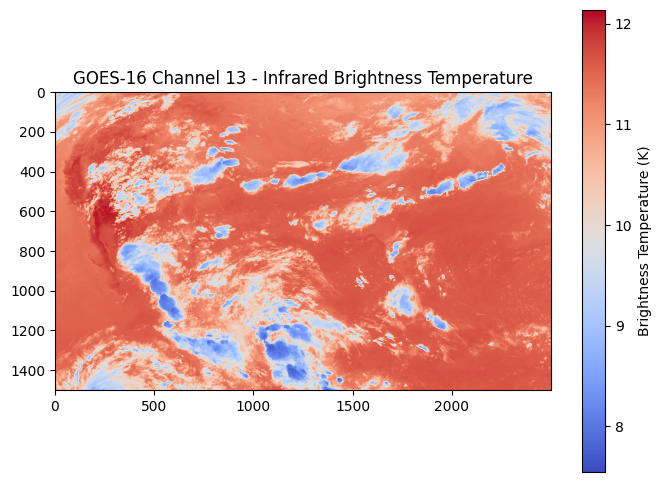

In [6]:
import numpy as np

try:
    # Extract and scale CMI_C13 (Infrared Brightness Temperature)
    c13_var = dataset.variables.get('CMI_C13', None)  # Check if variable exists
    if c13_var is None:
        raise KeyError("CMI_C13 not found in the dataset.")

    c13_data = c13_var[:]
    scale_factor = c13_var.scale_factor if 'scale_factor' in c13_var.ncattrs() else 1.0
    c13_data = c13_data * scale_factor  # Apply scaling

    # Plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(c13_data, cmap="coolwarm", origin="upper")
    plt.colorbar(label="Brightness Temperature (K)")
    plt.title("GOES-16 Channel 13 - Infrared Brightness Temperature")
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

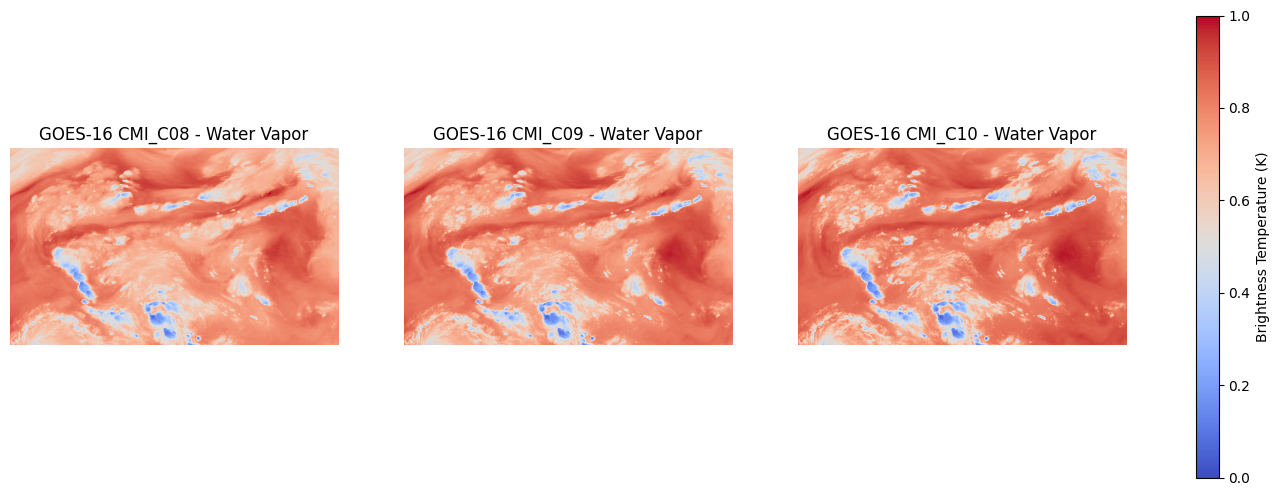

In [7]:
try:
    # Extract Water Vapor Bands (CMI_C08, CMI_C09, CMI_C10)
    bands = ['CMI_C08', 'CMI_C09', 'CMI_C10']
    water_vapor_data = {}

    for band in bands:
        if band in dataset.variables:
            var = dataset.variables[band][:]
            scale_factor = dataset.variables[band].scale_factor if 'scale_factor' in dataset.variables[band].ncattrs() else 1.0
            water_vapor_data[band] = var * scale_factor
        else:
            print(f"Warning: {band} not found in dataset.")

    # Plot Water Vapor Bands
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    colormap = "coolwarm"

    for i, band in enumerate(bands):
        if band in water_vapor_data:
            axes[i].imshow(water_vapor_data[band], cmap=colormap, origin="upper")
            axes[i].set_title(f"GOES-16 {band} - Water Vapor")
            axes[i].axis("off")

    plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), ax=axes, orientation="vertical", label="Brightness Temperature (K)")
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


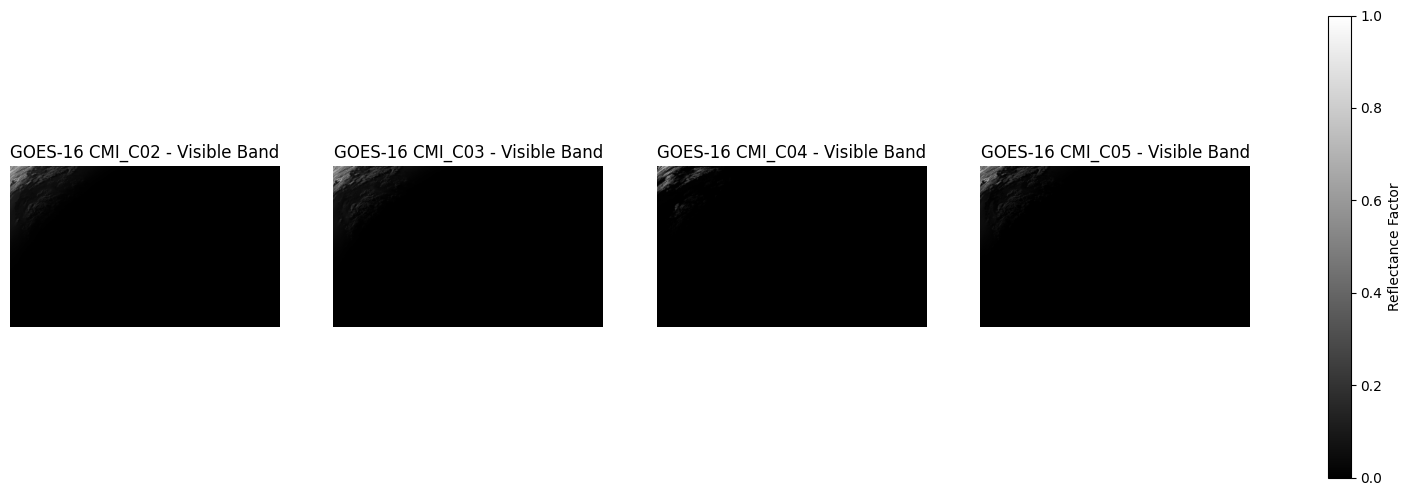

In [8]:
try:
    # Extract Visible Bands (CMI_C02, CMI_C03, CMI_C04, CMI_C05)
    bands = ['CMI_C02', 'CMI_C03', 'CMI_C04', 'CMI_C05']
    visible_data = {}

    for band in bands:
        if band in dataset.variables:
            var = dataset.variables[band][:]
            scale_factor = dataset.variables[band].scale_factor if 'scale_factor' in dataset.variables[band].ncattrs() else 1.0
            visible_data[band] = var * scale_factor
        else:
            print(f"Warning: {band} not found in dataset.")

    # Plot Visible Bands
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    colormap = "grey"

    for i, band in enumerate(bands):
        if band in visible_data:
            axes[i].imshow(visible_data[band], cmap=colormap, origin="upper")
            axes[i].set_title(f"GOES-16 {band} - Visible Band")
            axes[i].axis("off")

    plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), ax=axes, orientation="vertical", label="Reflectance Factor")
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


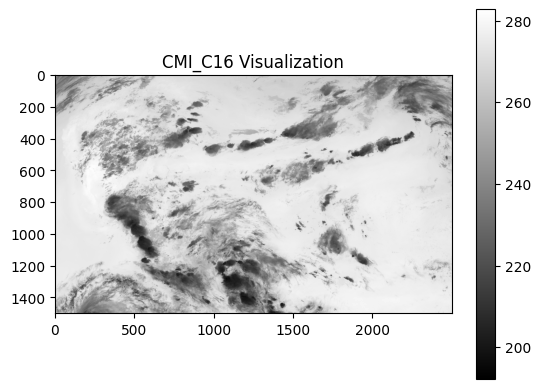

In [9]:
variable_name = "CMI_C16"  # Modify this based on available variables

if variable_name in dataset.variables:
    data = dataset.variables[variable_name][:]
    plt.imshow(data, cmap="gray")  # Change colormap if needed
    plt.colorbar()
    plt.title(f"{variable_name} Visualization")
    plt.show()
else:
    print(f"Variable '{variable_name}' not found in dataset.")

In [10]:
variable_name = "DQF_C15"  # Replace with actual variable

if variable_name in dataset.variables:
    data = dataset.variables[variable_name][:]
    print(f"\nExtracted Data Shape: {np.shape(data)}")
else:
    print(f"Variable '{variable_name}' not found in dataset.")


Extracted Data Shape: (1500, 2500)


In [11]:
from scipy.ndimage import uniform_filter
import os 

# File paths
output_file = os.path.join(downloader.data_dir, "cleaned_GOES18.nc")

# Create output NetCDF file
cleaned_dataset = nc.Dataset(output_file, "w", format="NETCDF4")

# Copy global attributes
cleaned_dataset.setncatts(dataset.__dict__)

# Copy dimensions
for name, dim in dataset.dimensions.items():
    cleaned_dataset.createDimension(name, len(dim) if not dim.isunlimited() else None)

# Identify all CMI bands
cmi_bands = [var for var in dataset.variables.keys() if var.startswith("CMI_C")]

# Function to clean and interpolate missing values
def clean_data(var_data, fill_value):
    var_data = np.where(var_data == fill_value, np.nan, var_data)
    mask = np.isnan(var_data)
    filled = np.copy(var_data)
    filled[mask] = 0
    weights = (~mask).astype(float)

    sum_vals = uniform_filter(filled, size=3, mode='nearest')
    sum_weights = uniform_filter(weights, size=3, mode='nearest')
    cleaned = sum_vals / sum_weights
    return np.where(mask, cleaned, var_data)

# Copy and clean variables
for var_name, var in dataset.variables.items():
    # Create new variable in cleaned dataset
    cleaned_var = cleaned_dataset.createVariable(var_name, var.datatype, var.dimensions)

    # Copy variable attributes
    cleaned_var.setncatts({k: var.getncattr(k) for k in var.ncattrs()})

    # Process CMI bands
    if var_name in cmi_bands:
        fill_value = var.getncattr("_FillValue") if "_FillValue" in var.ncattrs() else np.nan
        cleaned_var[:] = clean_data(var[:], fill_value)  # Apply missing value handling
    else:
        cleaned_var[:] = var[:]  # Copy other variables without modification

print(f"Cleaned dataset saved as: {output_file}")

Cleaned dataset saved as: data_goes\cleaned_GOES18.nc


In [13]:
import pandas as pd 

# Identify CMI bands
cmi_bands = [var for var in dataset.variables.keys() if var.startswith("CMI_C")]

# Initialize summary report
summary_data = []

# Function to apply normalization
def normalize_data(var_data, method="min-max"):
    """Normalize data using Min-Max Scaling or Standardization"""
    valid_data = var_data[~np.isnan(var_data)]  # Remove NaNs
    if method == "min-max":
        return (var_data - np.min(valid_data)) / (np.max(valid_data) - np.min(valid_data))
    elif method == "z-score":
        return (var_data - np.mean(valid_data)) / np.std(valid_data)
    else:
        return var_data  # No normalization

# Process each CMI band
for band in cmi_bands:
    var_data = dataset.variables[band][:]

    # Check for _FillValue and replace with NaN
    fill_value = dataset.variables[band].getncattr("_FillValue") if "_FillValue" in dataset.variables[band].ncattrs() else np.nan
    var_data = np.where(var_data == fill_value, np.nan, var_data)

    # Compute basic stats
    valid_values = var_data[~np.isnan(var_data)]
    min_val = np.min(valid_values) if valid_values.size > 0 else None
    max_val = np.max(valid_values) if valid_values.size > 0 else None
    mean_val = np.mean(valid_values) if valid_values.size > 0 else None
    std_val = np.std(valid_values) if valid_values.size > 0 else None
    missing_count = np.sum(np.isnan(var_data))

    # Normalize data using Min-Max Scaling
    normalized_data = normalize_data(var_data, method="min-max")

    # Append to summary
    summary_data.append([band, min_val, max_val, mean_val, std_val, missing_count])

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary_data, columns=["Band", "Min", "Max", "Mean", "Std Dev", "Missing Values"])

# Display summary
print("\n### Dataset Summary Report ###")
print(summary_df)


### Dataset Summary Report ###
       Band         Min         Max        Mean    Std Dev  Missing Values
0   CMI_C01    0.000000    0.684004    0.008695   0.038516               0
1   CMI_C02    0.000000    0.703784    0.007046   0.034598               0
2   CMI_C03    0.000000    0.830524    0.007739   0.039955               0
3   CMI_C04    0.000000    0.345299    0.001588   0.012421               0
4   CMI_C05    0.000000    0.720634    0.005274   0.030366               0
5   CMI_C06    0.000000    0.644932    0.004726   0.030745               0
6   CMI_C07  173.149994  357.546082  283.506683  19.275991               0
7   CMI_C08  192.847427  252.765381  236.250336   7.458704               0
8   CMI_C09  192.139740  262.594452  244.318893   9.541360               0
9   CMI_C10  192.021790  271.047424  252.223953  11.606336               0
10  CMI_C11  191.117523  303.522644  276.813904  20.363129               0
11  CMI_C12  209.871368  273.209839  257.258179  12.578670          

In [ ]:
print(dataset)
print(dataset.variables.keys())  # List of available variables

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: CONUS
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPC-M3_G16_s20171890252191_e20171890254564_c20171890255060.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    title: ABI L2 Clo

In [15]:
# Open the NetCDF dataset
try:
    # List all available variables
    print("\nAvailable Variables:")
    for var in dataset.variables.keys():
        print(f" - {var}")

    # Print details of a specific variable (e.g., first variable)
    sample_var = list(dataset.variables.keys())[0]
    print(f"\nVariable Details ({sample_var}):")
    print(dataset.variables[sample_var])

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Available Variables:
 - CMI_C01
 - DQF_C01
 - CMI_C02
 - DQF_C02
 - CMI_C03
 - DQF_C03
 - CMI_C04
 - DQF_C04
 - CMI_C05
 - DQF_C05
 - CMI_C06
 - DQF_C06
 - CMI_C07
 - DQF_C07
 - CMI_C08
 - DQF_C08
 - CMI_C09
 - DQF_C09
 - CMI_C10
 - DQF_C10
 - CMI_C11
 - DQF_C11
 - CMI_C12
 - DQF_C12
 - CMI_C13
 - DQF_C13
 - CMI_C14
 - DQF_C14
 - CMI_C15
 - DQF_C15
 - CMI_C16
 - DQF_C16
 - t
 - y
 - x
 - time_bounds
 - goes_imager_projection
 - y_image
 - y_image_bounds
 - x_image
 - x_image_bounds
 - nominal_satellite_subpoint_lat
 - nominal_satellite_subpoint_lon
 - nominal_satellite_height
 - geospatial_lat_lon_extent
 - band_wavelength_C01
 - band_wavelength_C02
 - band_wavelength_C03
 - band_wavelength_C04
 - band_wavelength_C05
 - band_wavelength_C06
 - band_wavelength_C07
 - band_wavelength_C08
 - band_wavelength_C09
 - band_wavelength_C10
 - band_wavelength_C11
 - band_wavelength_C12
 - band_wavelength_C13
 - band_wavelength_C14
 - band_wavelength_C15
 - band_wavelength_C16
 - band_id_C01
 - b